In [1]:
import pandas as pd

gpb=pd.read_csv('data/gpb.csv',encoding="shift-jis")
gpt=pd.read_csv('data/gp_each10min.csv',encoding="shift-jis")

In [2]:
df_ftv=gpt.loc[(gpt['局'] == 'FTV')]
df_ftv_rates=df_ftv[["datetime","視聴率（世帯）","曜日","timestamp"]]

#save datetime series as datetime formart
df_ftv_rates["datetime"]=pd.to_datetime(df_ftv_rates.datetime)
#set datetime series as index
df_ftv_rates=df_ftv_rates.set_index('datetime')
df_ftv_rates.tail()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,視聴率（世帯）,曜日,timestamp
datetime,,,
2019-12-31 22:10:00,4.7,火,1577830200
2019-12-31 22:20:00,7.0,火,1577830800
2019-12-31 22:30:00,5.9,火,1577831400
2019-12-31 22:40:00,5.0,火,1577832000
2019-12-31 22:50:00,5.9,火,1577832600


In [3]:
df_loc=df_ftv_rates.loc[(df_ftv_rates['曜日'] == '水')]
locs=df_loc.index.indexer_at_time('21:10:00')
ts_loc=df_loc.iloc[locs]
ts_loc.head()

,視聴率（世帯）,曜日,timestamp
datetime,,,
2017-01-04 21:10:00,12.6,水,1483564200
2017-01-11 21:10:00,10.5,水,1484169000
2017-01-18 21:10:00,10.7,水,1484773800
2017-01-25 21:10:00,9.5,水,1485378600
2017-02-01 21:10:00,10.0,水,1485983400


In [4]:
ftv_code=[]
ftv_title=[]

for index,row in ts_loc.iterrows():
    t=row.timestamp
    for a,b,c in zip(gpb.datetimets,gpb.endtimets,gpb["Unnamed: 0"]):
        if t in range(a,b):
            if gpb["局"][c]=="FTV":
                ftv_code.append(gpb["番組分類コード"][c])
                ftv_title.append(gpb["メインタイトル"][c])
            else:
                pass
        else:
            pass
                
ts_loc["番組分類コード"]=ftv_code
ts_loc["メインタイトル"]=ftv_title
ts_loc

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,視聴率（世帯）,曜日,timestamp,番組分類コード,メインタイトル
datetime,,,,,
2017-01-04 21:10:00,12.6,水,1483564200,190,ホンマでっか！？ＴＶ２０１７年チン初め運気爆上がり４時間スペ
2017-01-11 21:10:00,10.5,水,1484169000,190,ホンマでっか！？ＴＶ
2017-01-18 21:10:00,10.7,水,1484773800,190,ホンマでっか！？ＴＶ
2017-01-25 21:10:00,9.5,水,1485378600,190,ホンマでっか！？ＴＶ
2017-02-01 21:10:00,10.0,水,1485983400,190,ホンマでっか！？ＴＶ
2017-02-08 21:10:00,12.1,水,1486588200,190,ホンマでっか！？ＴＶ
2017-02-15 21:10:00,8.6,水,1487193000,190,ホンマでっか！？ＴＶ
2017-02-22 21:10:00,9.0,水,1487797800,190,ホンマでっか！？ＴＶ
2017-03-01 21:10:00,12.6,水,1488402600,190,さんまの東大方程式


In [5]:
import collections
c=collections.Counter(ftv_title)
for k,v in c.most_common(5):
    print(k,v)

ホンマでっか！？ＴＶ　　　　　　　　　　　　　　　　　　　　 91
梅沢富美男のズバッと聞きます！ＳＰ　　　　　　　　　　　　　 3
おたすけＪＡＰＡＮ　　　　　　　　　　　　　　　　　　　　　 2
ＦＮＳうたの夏まつり　　　　　　　　　　　　　　　　　　　　 2
ホンマでっか！？ＴＶ２０１７年チン初め運気爆上がり４時間スペ 1


In [6]:
ttl=ts_loc["メインタイトル"]["2019-08-21 21:10:00"]
loc2=ts_loc.loc[(ts_loc['メインタイトル'] == ttl)]
loc2.head()

,視聴率（世帯）,曜日,timestamp,番組分類コード,メインタイトル
datetime,,,,,
2017-01-11 21:10:00,10.5,水,1484169000,190,ホンマでっか！？ＴＶ
2017-01-18 21:10:00,10.7,水,1484773800,190,ホンマでっか！？ＴＶ
2017-01-25 21:10:00,9.5,水,1485378600,190,ホンマでっか！？ＴＶ
2017-02-01 21:10:00,10.0,水,1485983400,190,ホンマでっか！？ＴＶ
2017-02-08 21:10:00,12.1,水,1486588200,190,ホンマでっか！？ＴＶ


In [7]:
import numpy as np

loc3=ts_loc["2017-01-11 21:10:00":]

ftv_na=[]

for index,row in loc3.iterrows():
    if row["メインタイトル"]==ttl:
        ftv_na.append(row["視聴率（世帯）"])
    else:
        ftv_na.append(np.nan)
loc3["視聴率（修正）"]=ftv_na
loc3=loc3.apply(pd.Series.interpolate)
loc3

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,視聴率（世帯）,曜日,timestamp,番組分類コード,メインタイトル,視聴率（修正）
datetime,,,,,,
2017-01-11 21:10:00,10.5,水,1484169000,190,ホンマでっか！？ＴＶ,10.500000
2017-01-18 21:10:00,10.7,水,1484773800,190,ホンマでっか！？ＴＶ,10.700000
2017-01-25 21:10:00,9.5,水,1485378600,190,ホンマでっか！？ＴＶ,9.500000
2017-02-01 21:10:00,10.0,水,1485983400,190,ホンマでっか！？ＴＶ,10.000000
2017-02-08 21:10:00,12.1,水,1486588200,190,ホンマでっか！？ＴＶ,12.100000
2017-02-15 21:10:00,8.6,水,1487193000,190,ホンマでっか！？ＴＶ,8.600000
2017-02-22 21:10:00,9.0,水,1487797800,190,ホンマでっか！？ＴＶ,9.000000
2017-03-01 21:10:00,12.6,水,1488402600,190,さんまの東大方程式,9.350000
2017-03-08 21:10:00,9.7,水,1489007400,190,ホンマでっか！？ＴＶ,9.700000


In [70]:
data=loc3["視聴率（修正）"]
ts=data
print(ts)
len(ts)

datetime
2017-01-11 21:10:00   10.50
2017-01-18 21:10:00   10.70
2017-01-25 21:10:00    9.50
2017-02-01 21:10:00   10.00
2017-02-08 21:10:00   12.10
2017-02-15 21:10:00    8.60
2017-02-22 21:10:00    9.00
2017-03-01 21:10:00    9.35
2017-03-08 21:10:00    9.70
2017-03-15 21:10:00    9.60
2017-03-22 21:10:00    9.18
2017-03-29 21:10:00    8.75
2017-04-05 21:10:00    8.32
2017-04-12 21:10:00    7.90
2017-04-19 21:10:00    7.50
2017-04-26 21:10:00    6.00
2017-05-03 21:10:00    6.90
2017-05-10 21:10:00    8.70
2017-05-17 21:10:00    8.90
2017-05-24 21:10:00    9.00
2017-05-31 21:10:00    8.00
2017-06-07 21:10:00    7.00
2017-06-14 21:10:00    7.85
2017-06-21 21:10:00    8.70
2017-06-28 21:10:00    8.45
2017-07-05 21:10:00    8.20
2017-07-12 21:10:00    7.95
2017-07-19 21:10:00    7.70
2017-07-26 21:10:00    7.20
2017-08-02 21:10:00    7.50
                       ... 
2019-06-05 21:10:00    7.03
2019-06-12 21:10:00    7.20
2019-06-19 21:10:00    8.80
2019-06-26 21:10:00    7.90
2019-07-03 

155

In [71]:
import numpy as np
from scipy import stats

from statsmodels.tsa.stattools import adfuller

# Dickey-Fuller test 結果と標準偏差、平均のプロット
def test_stationarity(timeseries, window_size=12):
    # Determing rolling statistics
    rolmean = timeseries.rolling(window=window_size,center=False).mean()
    rolstd = timeseries.rolling(window=window_size,center=False).std()

    # Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value',
                                             '#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

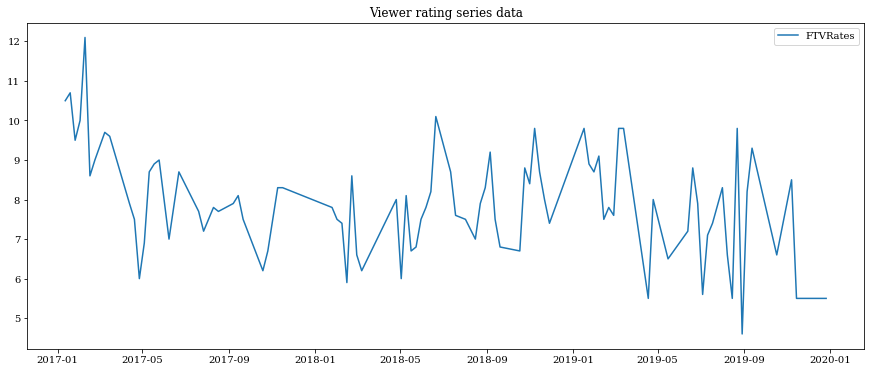

In [72]:
# グラフ描画
from matplotlib import pylab as plt
import seaborn as sns
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

import matplotlib as mpl
mpl.rcParams['font.family'] = ['serif']

plt.plot(ts, label='FTVRates')
plt.title('Viewer rating series data')
plt.legend(loc='best')

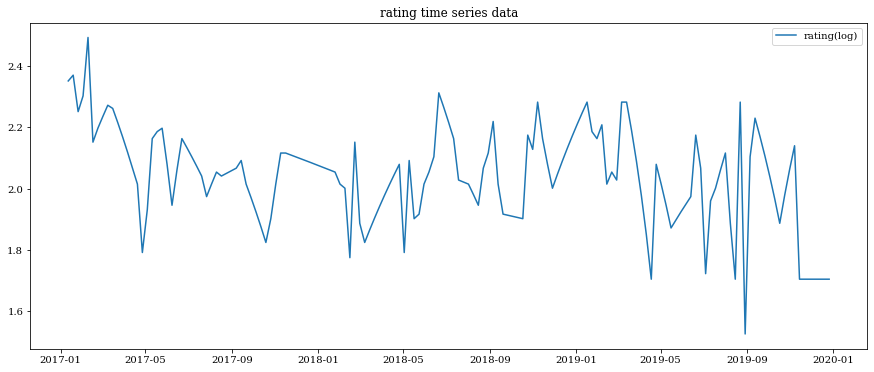

In [73]:
#対数をとって傾向を確認

ts_log = np.log(ts)
plt.plot(ts_log, label='rating(log)')
plt.title('rating time series data')
plt.legend(loc='best')

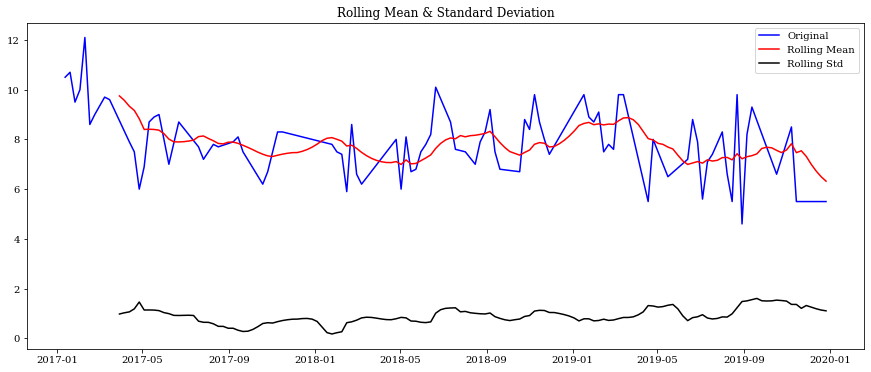

Results of Dickey-Fuller Test:
Test Statistic                 -4.91
p-value                         0.00
#Lags Used                      1.00
Number of Observations Used   153.00
Critical Value (1%)            -3.47
Critical Value (5%)            -2.88
Critical Value (10%)           -2.58
dtype: float64


In [74]:
'''
定常性をチェックするための統計的テストの1つ。
ここで、帰無仮説は、ts が非定常であるということ。
テスト結果は、「検定統計量(Test Statistic)」と1,5,10%の信頼水準の「臨界値(Critical Value)」から構成されます。
「検定統計量」が「臨界値」よりも小さい場合は、帰無仮説を棄却して系列が定常状態と判定。

'''

test_stationarity(ts, window_size=12)


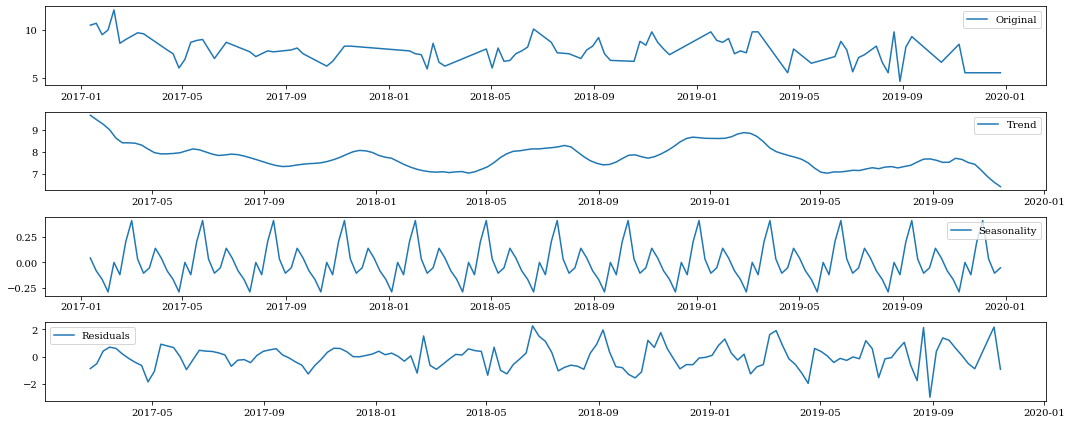

In [75]:

# 傾向(trend)、季節性(seasonal)、残差(residual)に分解してモデル化する。
# https://momonoki2017.blogspot.com/2018/03/python6.html

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts,freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


# オリジナルの時系列データプロット
# 411=グラフ4行1列の1番目の位置（一番上）
plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='best')
 
# trend のプロット
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
 
# seasonal のプロット
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
 
# residual のプロット
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

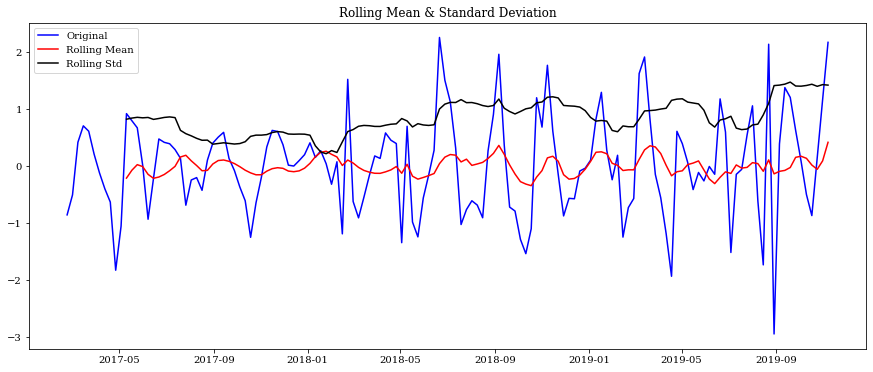

Results of Dickey-Fuller Test:
Test Statistic                 -4.10
p-value                         0.00
#Lags Used                     10.00
Number of Observations Used   131.00
Critical Value (1%)            -3.48
Critical Value (5%)            -2.88
Critical Value (10%)           -2.58
dtype: float64


In [76]:
'''
定常性をチェックするための統計的テストの1つ。
ここで、帰無仮説は、ts が非定常であるということ。
テスト結果は、「検定統計量(Test Statistic)」と1,5,10%の信頼水準の「臨界値(Critical Value)」から構成されます。
「検定統計量」が「臨界値」よりも小さい場合は、帰無仮説を棄却して系列が定常状態と判定。

'''

test_stationarity(residual[6:-7], window_size=12)


In [77]:
# 総当たりで、AICが最小となるSARIMAの次数を探す
max_p = 3
max_d = 1
max_q = 3
max_sp = 1
max_sd = 1
max_sq = 1

pattern = max_p*(max_q + 1)*(max_d + 1)*(max_sp + 1)*(max_sq + 1)*(max_sd + 1)

#maxlag should be < nobs always OCCUR in python3, how to fix it?
#https://github.com/statsmodels/statsmodels/issues/4465
#SARIMAX (p,d,q)x(P,D,Q,s)
#d + D*s + max(3*q + 1, 3*Q*s + 1, p, P*s) + 1 observations

s=12
atleast=max_d+max_sd*s+max(3*max_q+1,3*max_sq*s+1,max_p,max_sp,s)+s

modelSelection = pd.DataFrame(index=range(pattern), columns=["model", "aic"])
print("pattern:",pattern)
print("atleast:",atleast)

pattern: 192
atleast: 62


In [78]:

import statsmodels.api as sm

# 自動SARIMA選択
num = 0

for p in range(1, max_p + 1):
    for d in range(0, max_d + 1):
        for q in range(0, max_q + 1):
            for sp in range(0, max_sp + 1):
                for sd in range(0, max_sd + 1):
                    for sq in range(0, max_sq + 1):
                        sarima = sm.tsa.SARIMAX(
                            ts, order=(p,d,q), 
                            seasonal_order=(sp,sd,sq,12), 
                            enforce_stationarity = False, 
                            enforce_invertibility = False
                        ).fit()
                        modelSelection.iloc[num]["model"] = "order=(" + str(p) + ","+ str(d) + ","+ str(q) + "), season=("+ str(sp) + ","+ str(sd) + "," + str(sq) + ")"
                        modelSelection.iloc[num]["aic"] = sarima.aic
                        num = num + 1

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  % freq, ValueWarn

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  % freq, ValueWarn

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  % fre

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  % freq, ValueWarn

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  % fre

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  % freq, ValueWarning)


In [79]:
# モデルごとの結果確認
print(modelSelection)
# AIC最小モデル
print(modelSelection[modelSelection.aic == min(modelSelection.aic)])

                             model    aic
0    order=(1,0,0), season=(0,0,0) 467.21
1    order=(1,0,0), season=(0,0,1) 427.54
2    order=(1,0,0), season=(0,1,0) 508.36
3    order=(1,0,0), season=(0,1,1) 388.45
4    order=(1,0,0), season=(1,0,0) 426.34
5    order=(1,0,0), season=(1,0,1) 431.87
6    order=(1,0,0), season=(1,1,0) 410.38
7    order=(1,0,0), season=(1,1,1) 392.10
8    order=(1,0,1), season=(0,0,0) 437.54
9    order=(1,0,1), season=(0,0,1) 402.69
10   order=(1,0,1), season=(0,1,0) 499.91
11   order=(1,0,1), season=(0,1,1) 382.50
12   order=(1,0,1), season=(1,0,0) 404.33
13   order=(1,0,1), season=(1,0,1) 405.11
14   order=(1,0,1), season=(1,1,0) 411.39
15   order=(1,0,1), season=(1,1,1) 390.15
16   order=(1,0,2), season=(0,0,0) 432.08
17   order=(1,0,2), season=(0,0,1) 394.96
18   order=(1,0,2), season=(0,1,0) 495.33
19   order=(1,0,2), season=(0,1,1) 381.78
20   order=(1,0,2), season=(1,0,0) 397.69
21   order=(1,0,2), season=(1,0,1) 395.61
22   order=(1,0,2), season=(1,1,0)

In [80]:
import statsmodels.api as sm

p=3
d=1
q=3
sp=0
sd=1
sq=1

sarima = sm.tsa.SARIMAX(
    ts, order=(p,d,q), 
    seasonal_order=(sp,sd,sq,12), 
    enforce_stationarity = False, 
    enforce_invertibility = False
).fit()
# 結果確認
print(sarima.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                            視聴率（修正）   No. Observations:                  155
Model:             SARIMAX(3, 1, 3)x(0, 1, 1, 12)   Log Likelihood                -182.603
Date:                            Sun, 22 Mar 2020   AIC                            381.207
Time:                                    22:01:10   BIC                            403.897
Sample:                                01-11-2017   HQIC                           390.425
                                     - 12-25-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6065      0.158     -3.847      0.000      -0.916      -0.298
ar.L2         -0.2327      0.193   

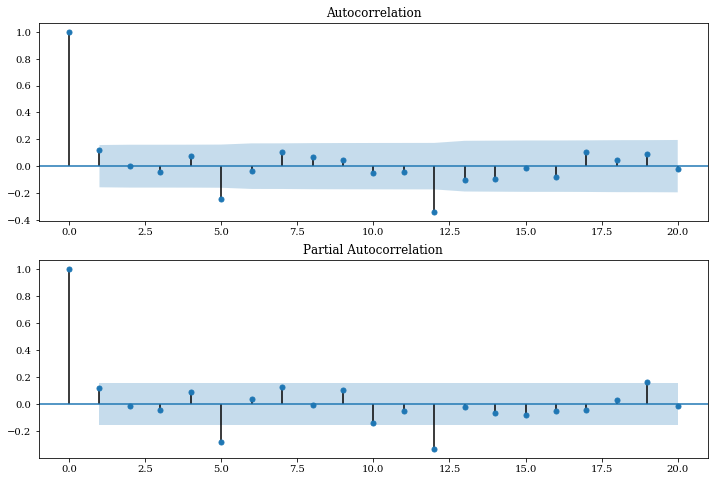

In [81]:
# 残差のチェック
residSARIMA = sarima.resid
fig = plt.figure(figsize=(12,8))

# 自己相関
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(residSARIMA, lags=20, ax=ax1)

# 偏自己相関
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(residSARIMA, lags=20, ax=ax2)

# 残差の自己相関については、ほぼ問題なくなったことを確認

In [82]:
# 予測
ts_pred = sarima.predict('2019-09-04', '2020-03-25')

predict_dy = sarima.get_prediction(start ='2019-09-04',end='2020-03-25')
predict_dy_ci = predict_dy.conf_int(alpha=0.05) # defalut alpah=0.05 :returns a 95% confidence interval


2019-10-09 21:10:00   7.39
2019-10-16 21:10:00   7.97
2019-10-23 21:10:00   6.50
2019-10-30 21:10:00   6.81
2019-11-06 21:10:00   7.77
2019-11-13 21:10:00   8.26
2019-11-20 21:10:00   6.34
2019-11-27 21:10:00   6.72
2019-12-04 21:10:00   5.99
2019-12-11 21:10:00   6.30
2019-12-18 21:10:00   5.83
2019-12-25 21:10:00   5.71
2020-01-01 21:10:00   6.42
2020-01-08 21:10:00   6.19
2020-01-15 21:10:00   6.06
2020-01-22 21:10:00   6.36
2020-01-29 21:10:00   5.99
2020-02-05 21:10:00   6.44
2020-02-12 21:10:00   6.26
2020-02-19 21:10:00   6.31
2020-02-26 21:10:00   6.63
2020-03-04 21:10:00   6.38
2020-03-11 21:10:00   5.99
2020-03-18 21:10:00   6.21
2020-03-25 21:10:00   6.42
Freq: W-WED, dtype: float64


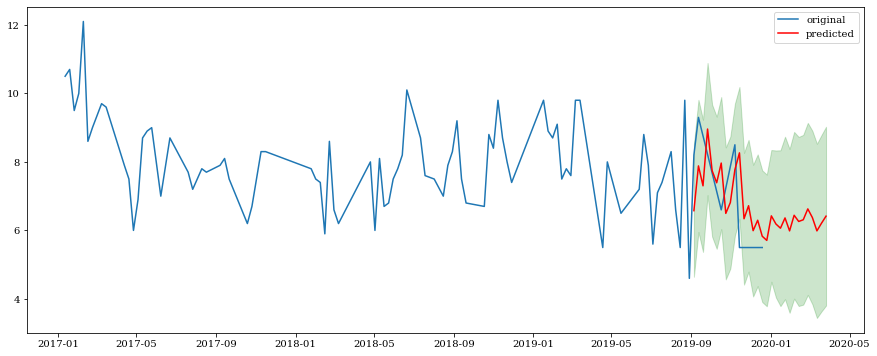

In [83]:
# 実データと予測結果の図示
plt.plot(data[-365:-1], label='original')
plt.plot(ts_pred, label='predicted', color='red')
plt.legend(loc='best')
plt.fill_between(predict_dy_ci.index, predict_dy_ci.iloc[:, 0], predict_dy_ci.iloc[:, 1], color='g', alpha=0.2)

print(ts_pred[-25:])

In [84]:
p=ts_pred[-31:-17]
t=data[-17:-4]

In [85]:
g=abs(t-p)
r=g/p*100

In [86]:
pd.options.display.float_format = '{:.2f}'.format

df2=pd.DataFrame({"予測":p, "実際":t,"誤差":g,"誤差率（%）":r})
df2.index.name = "日付"
df2

,予測,実際,誤差,誤差率（%）
日付,,,,
2019-09-04 21:10:00,6.58,8.20,1.62,24.69
2019-09-11 21:10:00,7.88,9.30,1.42,17.97
2019-09-18 21:10:00,7.30,8.76,1.46,19.97
2019-09-25 21:10:00,8.96,8.22,0.74,8.25
2019-10-02 21:10:00,7.74,7.68,0.06,0.84
2019-10-09 21:10:00,7.39,7.14,0.25,3.40
2019-10-16 21:10:00,7.97,6.60,1.37,17.15
2019-10-23 21:10:00,6.50,7.23,0.74,11.34
2019-10-30 21:10:00,6.81,7.87,1.05,15.45


In [87]:
#RMSE
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(t, p))

1.279074111905687

In [88]:
#MAPE

import numpy as np
np.mean(np.abs((p - t) / t)) * 100



15.815035188658696

In [37]:
#外れ原因調査

t=loc3["timestamp"]["2019-09-11 21:10:00"]
result=gpb.loc[(gpb.datetimets<t)&(gpb.endtimets>t)]
result.drop(columns=["Unnamed: 0","年","月","日","開始時","開始分","datetimets","endtimets"])

,datetime,曜日,局,放送分数,番組分類コード,新番組コード,占拠率（世帯）,メインタイトル,サブタイトル,endtime
52582,2019-09-11 21:00:00,水,NTV,54,190,,9.20,今夜くらべてみました,,2019-09-11 21:54:00
52586,2019-09-11 20:00:00,水,TBS,120,553,,5.10,マラソン・グランド・チャンピオンシップ東京五輪代表を懸けた運,,2019-09-11 22:00:00
52590,2019-09-11 21:00:00,水,FTV,54,190,,9.40,ホンマでっか！？ＴＶ,,2019-09-11 21:54:00
52597,2019-09-11 21:00:00,水,ANB,54,360,,11.30,刑事７人,,2019-09-11 21:54:00
52602,2019-09-11 21:00:00,水,TX,60,190,,7.50,家、ついて行ってイイですか？,,2019-09-11 22:00:00
52611,2019-09-11 21:00:00,水,NHK1,60,010,,8.50,ニュースウオッチ９,,2019-09-11 22:00:00
52625,2019-09-11 21:00:00,水,NHK2,24,07F,,0.70,きょうの料理,,2019-09-11 21:24:00
